In [64]:
import pandas as pd
import numpy as np
import os

In [65]:
path = "C:/Users/chuda/Bootcamp_project/Deep Learing/Level2_Problem3/training" # use your path

df_list = [] 
frame = pd.DataFrame()
for file in os.listdir(path):
    df = pd.read_csv(path+'/'+file)
    df_list.append(df) 
frame = pd.concat(df_list) 
dff = frame

dff.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [66]:
dff

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
107232,North America,US,Wyoming,Cheyenne,12,27,2016,32.1
107233,North America,US,Wyoming,Cheyenne,12,28,2016,35.1
107234,North America,US,Wyoming,Cheyenne,12,29,2016,26.2
107235,North America,US,Wyoming,Cheyenne,12,30,2016,41.9


In [60]:
dft = pd.read_excel('test_data (4).xlsx')

In [67]:
dff.dropna(axis = 1, inplace = True)
dft.dropna(axis = 1, inplace = True)

In [68]:
dff.head()

,HQ,Country,City_of_outlet,Month,Day,Year,Total_Sales
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [69]:
dft.head()

,ID,HQ,Country,City_of_outlet,Month,Day,Year
0,8037,Africa,Algeria,Algiers,1,1,2017
1,8038,Africa,Algeria,Algiers,1,2,2017
2,8039,Africa,Algeria,Algiers,1,3,2017
3,8040,Africa,Algeria,Algiers,1,4,2017
4,8041,Africa,Algeria,Algiers,1,5,2017


In [15]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()
dff['HQ'] = le.fit_transform(dff['HQ'])
dft['HQ'] = le.transform(dft['HQ'])
dff['Country'] = le.fit_transform(dff['Country'])
dft['Country'] = le.transform(dft['Country'])
dff['City_of_outlet'] = le.fit_transform(dff['City_of_outlet'])
dft['City_of_outlet'] = le.transform(dft['City_of_outlet'])

In [71]:
y = dff['Total_Sales']

In [72]:
X = dff.drop(['Total_Sales','Year'], axis = 1)

In [73]:
y.head()

0    64.2
1    49.4
2    48.8
3    46.4
4    47.9
Name: Total_Sales, dtype: float64

In [74]:
X.head()

,HQ,Country,City_of_outlet,Month,Day
0,0,1,7,1,1
1,0,1,7,1,2
2,0,1,7,1,3
3,0,1,7,1,4
4,0,1,7,1,5


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

In [79]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [80]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))

In [81]:
x_train.shape

(1782967, 5, 1)

In [82]:
step = len(X.columns)

In [83]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [84]:
model = Sequential()
model.add(LSTM(64,input_shape=(step,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [85]:
history = model.fit(x_train,y_train,epochs=20,batch_size=10000,validation_data=(x_test,y_test),shuffle=False)

Train on 1782967 samples, validate on 764129 samples
Epoch 1/20
1782967/1782967 [==============================] - 86s 48us/step - loss: 2938.5207 - val_loss: 2077.2459
Epoch 2/20
1782967/1782967 [==============================] - 89s 50us/step - loss: 1772.2056 - val_loss: 1531.3156
Epoch 3/20
1782967/1782967 [==============================] - 110s 62us/step - loss: 1382.6415 - val_loss: 1268.3511
Epoch 4/20
1782967/1782967 [==============================] - 111s 62us/step - loss: 1201.3043 - val_loss: 1153.5246
Epoch 5/20
1782967/1782967 [==============================] - 98s 55us/step - loss: 1127.0876 - val_loss: 1110.7812
Epoch 6/20
1782967/1782967 [==============================] - 113s 63us/step - loss: 1101.4983 - val_loss: 1097.6093
Epoch 7/20
1782967/1782967 [==============================] - 117s 66us/step - loss: 1094.2342 - val_loss: 1094.2921
Epoch 8/20
1782967/1782967 [==============================] - 108s 61us/step - loss: 1092.5435 - val_loss: 1093.5837
Epoch 9/20
178

In [86]:
pred = model.predict(x_test)

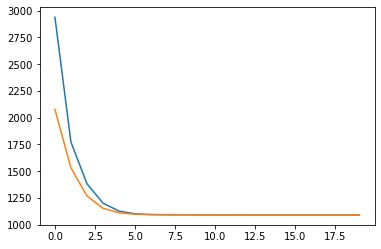

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [44]:
from sklearn import metrics

In [88]:
print(metrics.mean_squared_error(y_test,pred))

1092.1091278222798


In [89]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

33.04707442153208


In [90]:
df_t = dft[X.columns]

In [91]:
df_t1 = sc.transform(df_t)

In [92]:
df_t1

array([[-2.08978281, -2.22978237, -1.65464527, -1.59975883, -1.67364666],
       [-2.08978281, -2.22978237, -1.65464527, -1.59975883, -1.5600093 ],
       [-2.08978281, -2.22978237, -1.65464527, -1.59975883, -1.44637195],
       ...,
       [ 0.626914  ,  0.73604999, -0.93317255, -0.44000968, -0.53727309],
       [ 0.626914  ,  0.73604999, -0.93317255, -0.44000968, -0.42363573],
       [ 0.626914  ,  0.73604999, -0.93317255, -0.44000968, -0.30999838]])

In [93]:
df_t1 = df_t1.reshape((df_t1.shape[0],df_t1.shape[1],1))

In [94]:
df_t1

array([[[-2.08978281],
        [-2.22978237],
        [-1.65464527],
        [-1.59975883],
        [-1.67364666]],

       [[-2.08978281],
        [-2.22978237],
        [-1.65464527],
        [-1.59975883],
        [-1.5600093 ]],

       [[-2.08978281],
        [-2.22978237],
        [-1.65464527],
        [-1.59975883],
        [-1.44637195]],

       ...,

       [[ 0.626914  ],
        [ 0.73604999],
        [-0.93317255],
        [-0.44000968],
        [-0.53727309]],

       [[ 0.626914  ],
        [ 0.73604999],
        [-0.93317255],
        [-0.44000968],
        [-0.42363573]],

       [[ 0.626914  ],
        [ 0.73604999],
        [-0.93317255],
        [-0.44000968],
        [-0.30999838]]])

In [95]:
predd = model.predict(df_t1)

In [97]:
pd.DataFrame(predd, index = dft['ID']).to_csv("Attempt164.csv")